In [1]:
import tensorflow as tf import os import pandas as pd import numpy as np from sklearn.preprocessing import MinMaxScaler from keras.models import Sequential from keras.layers import LSTM, Dense import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/isabel/Library/CloudStorage/OneDrive-ISEC/Mestrado/23-24/LAD/Desafio#74 ALL/Datasets/3/noise_sensors.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'> RangeIndex: 291052 entries, 0 to 291051 Data columns (total 9 columns):  #   Column       Non-Null Count   Dtype   ---  ------       --------------   -----    0   id           291052 non-null  int64    1   date         291052 non-null  object   2   value        291052 non-null  float64  3   year         291052 non-null  int64    4   month        291052 non-null  int64    5   day          291052 non-null  int64    6   time         291052 non-null  object   7   name         291052 non-null  object   8   noise_level  291052 non-null  object  dtypes: float64(1), int64(4), object(4) memory usage: 20.0+ MB 

In [7]:
df.head()

,id,date,value,year,month,day,time,name,noise_level
0,1,2022-10-31 00:00:00,54.0,2022,10,31,00:00:00,CALCADA DA AJUDA,Moderate
1,1,2022-10-30 23:00:00,54.0,2022,10,30,23:00:00,CALCADA DA AJUDA,Moderate
2,1,2022-10-30 22:00:00,54.0,2022,10,30,22:00:00,CALCADA DA AJUDA,Moderate
3,1,2022-10-30 21:00:00,54.0,2022,10,30,21:00:00,CALCADA DA AJUDA,Moderate
4,1,2022-10-30 20:00:00,54.0,2022,10,30,20:00:00,CALCADA DA AJUDA,Moderate


In [9]:
 summary_table = df.groupby('noise_level').agg(     Records=('id', 'count'),     Min_Value=('value', 'min'),     Max_Value=('value', 'max'),     Mean_Value=('value', 'mean') ).reset_index()  print(summary_table) 

  noise_level  Records  Min_Value  Max_Value  Mean_Value 0        High    45220       59.0       63.0   61.100730 1    Moderate    46662       54.0       58.0   55.653765 2      Normal    48232       30.0       53.0   47.673785 3   Very High   150938       64.0       95.0   70.576614 

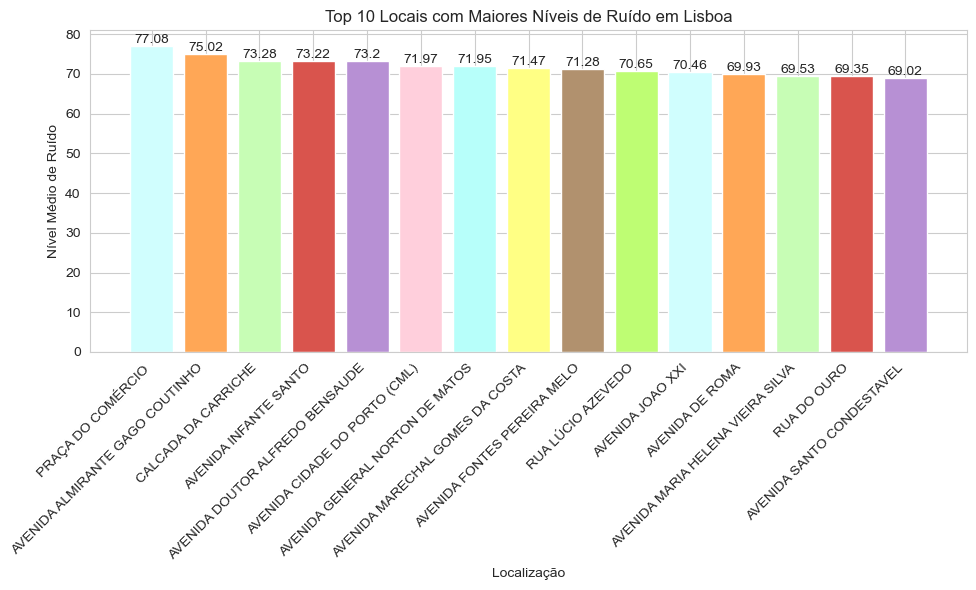

In [19]:
# Calcular a média do ruído para cada localização em Lisboa average_noise = df.groupby('name')['value'].mean().reset_index()  top_10_locations = average_noise.sort_values(by='value', ascending=False).head(15)  colors = ['xkcd:pale blue', 'xkcd:pale orange', 'xkcd:pale green', 'xkcd:pale red', 'xkcd:pale purple',                 'xkcd:pale pink', 'xkcd:pale cyan', 'xkcd:pale yellow', 'xkcd:pale brown', 'xkcd:pale lime']  plt.figure(figsize=(10, 6)) bars = plt.bar(top_10_locations['name'], top_10_locations['value'], color=colors)   plt.title('Top 10 Locais com Maiores Níveis de Ruído em Lisboa') plt.xlabel('Localização') plt.ylabel('Nível Médio de Ruído')  plt.xticks(rotation=45, ha='right')  for bar in bars:     yval = bar.get_height()     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')  # Exibir o gráfico plt.tight_layout() plt.show()  

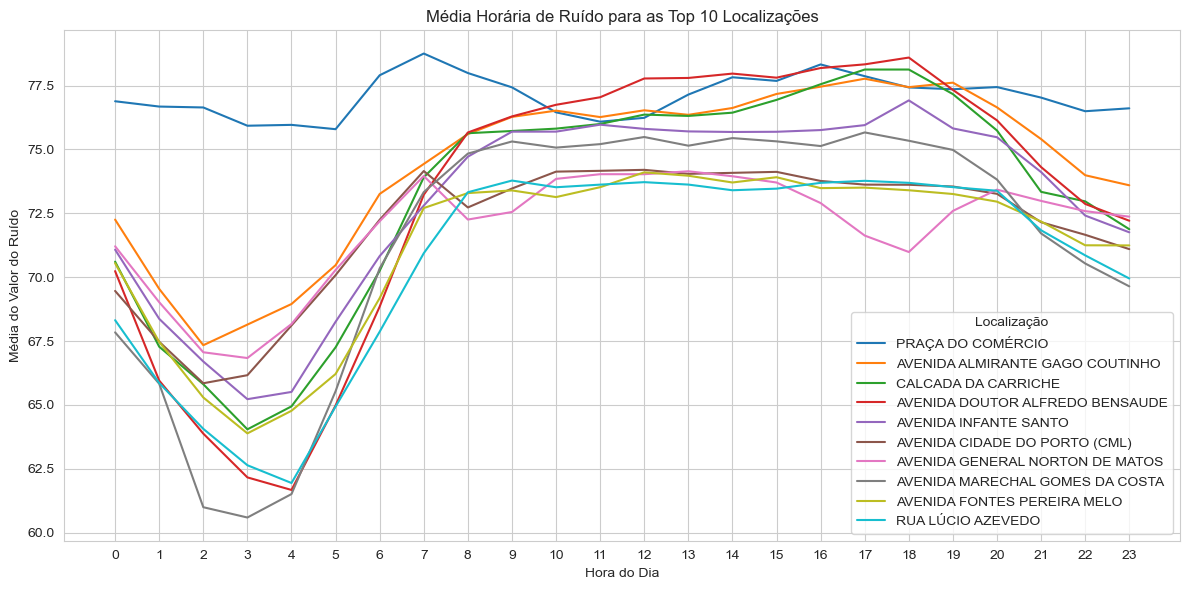

In [24]:
# Calcular a média horária para cada localização hourly_average_per_location = df.groupby(['name', 'hour'])['value'].mean().reset_index()  average_per_location = hourly_average_per_location.groupby('name')['value'].mean()  top_10_locations = average_per_location.nlargest(10)  hourly_average_top_10 = hourly_average_per_location[hourly_average_per_location['name'].isin(top_10_locations.index)]  plt.figure(figsize=(12, 6))  for location in top_10_locations.index:     location_data = hourly_average_top_10[hourly_average_top_10['name'] == location]     plt.plot(location_data['hour'], location_data['value'], label=location)  plt.title('Média Horária de Ruído para as Top 10 Localizações') plt.xlabel('Hora do Dia') plt.ylabel('Média do Valor do Ruído') plt.legend(title='Localização') plt.xticks(range(24)) plt.tight_layout() plt.show() 

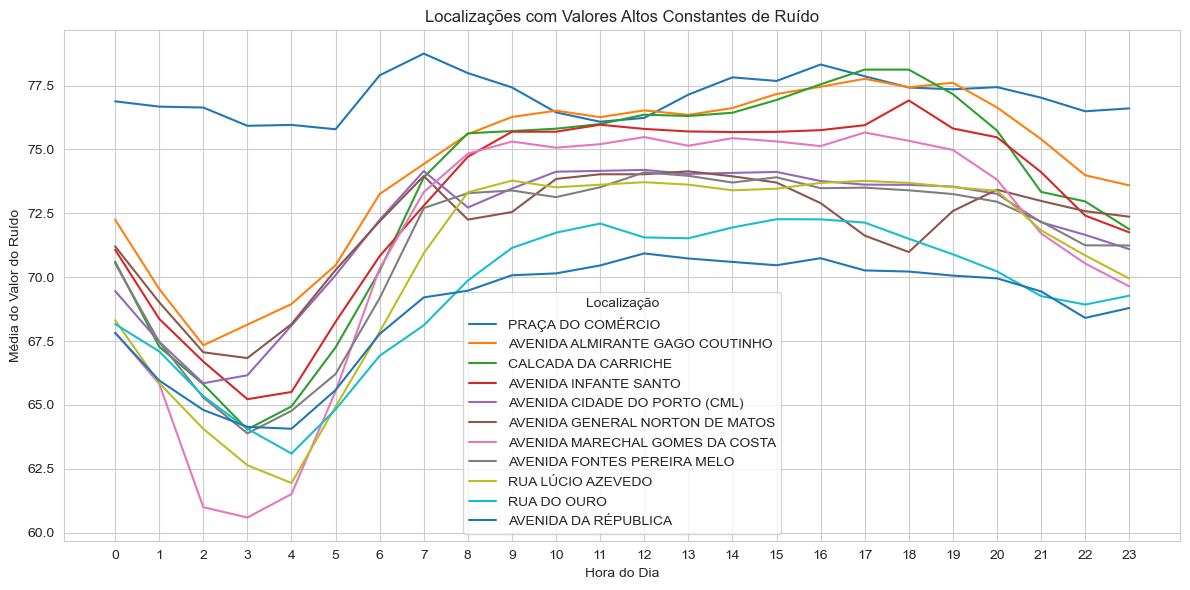

In [27]:
# Calcular a média horária para cada localização hourly_average_per_location = df.groupby(['name', 'hour'])['value'].mean().reset_index()  average_per_location = hourly_average_per_location.groupby('name')['value'].mean()  top_10_locations = average_per_location.nlargest(15)  hourly_average_top_10 = hourly_average_per_location[hourly_average_per_location['name'].isin(top_10_locations.index)]  consistent_high_values = [] for location in top_10_locations.index:     location_data = hourly_average_top_10[hourly_average_top_10['name'] == location]     if location_data['value'].min() > 0.8 * location_data['value'].max():           consistent_high_values.append(location)  hourly_average_consistent = hourly_average_top_10[hourly_average_top_10['name'].isin(consistent_high_values)]  plt.figure(figsize=(12, 6))  for location in consistent_high_values:     location_data = hourly_average_consistent[hourly_average_consistent['name'] == location]     plt.plot(location_data['hour'], location_data['value'], label=location)  plt.title('Localizações com Valores Altos Constantes de Ruído') plt.xlabel('Hora do Dia') plt.ylabel('Média do Valor do Ruído') plt.legend(title='Localização') plt.xticks(range(24)) plt.tight_layout() plt.show() 

In [33]:
sensor_names = df['name'].unique() for sensor in sensor_names:     print(sensor)

CALCADA DA AJUDA RUA GONÇALO VELHO CABRAL (EMQA) CAIS DO SODRÉ RUA DOS LUSIADAS (JFALCÂNTARA) AV 24 JULHO AVENIDA INFANTE SANTO AVENIDA INFANTE DOM HENRIQUE (SANTA APOLÓNIA) RUA DO OURO PRAÇA DO COMÉRCIO AVENIDA DE CEUTA (ETAR) RUA DE SÃO BENTO (MERCADO) COSTA CASTELO PRAÇA DO MARTIM MONIZ RUA DA ESCOLA POLITÉCNICA (JARDIM BOTÂNICO) ESTRADA DA CIRCUNVALAÇÃO (P. CAMPISMO) ESTRADA DE MONTES CLAROS AVENIDA DA LIBERDADE (EMQA) RUA DOS SAPADORES RUA MARIA PIA AVENIDA ALMIRANTE REIS RUA BRANCAMP AVENIDA INFANTE DOM HENRIQUE (HUB BEATO AVENIDA FONTES PEREIRA MELO AVENIDA ANTÓNIO AUGUSTO AGUIAR LARGO MADRE DEUS RUA CAMPOLIDE (ESCOLA) RUA MORAIS SOARES AVENIDA DA RÉPUBLICA PRAÇA SÃO FRANCISCO ASSIS ESTRADA DE MONSANTO AVENIDA COLUMBANO BORDALO PINHEIRO RUA PEDRO AZEVEDO ESTRADA DE BENFICA AVENIDA JOAO XXI TRAVESSA DE FRANCISCO REZENDE (QUINTA DA FONTE) AVENIDA ALMIRANTE GAGO COUTINHO AVENIDA SANTO CONDESTAVEL CAMPO GRANDE (EMQA) AVENIDA ESTADOS UNIDOS DA AMERICA AVENIDA LUSÍADA AVENIDA DE ROMA 

In [36]:
from geopy.geocoders import Nominatim  street_names = [     "CALCADA DA AJUDA",     "RUA NAU CATRINETA",     "RUA GONÇALO VELHO CABRAL (EMQA)",     "CAIS DO SODRÉ",     "RUA DOS LUSIADAS (JFALCÂNTARA)",     "AV 24 JULHO",     "AVENIDA INFANTE SANTO",     "AVENIDA INFANTE DOM HENRIQUE (SANTA APOLÓNIA)",     "RUA DO OURO",     "PRAÇA DO COMÉRCIO",     "AVENIDA DE CEUTA (ETAR)",     "RUA DE SÃO BENTO (MERCADO)",     "COSTA CASTELO",     "PRAÇA DO MARTIM MONIZ",     "RUA DA ESCOLA POLITÉCNICA (JARDIM BOTÂNICO)",     "ESTRADA DA CIRCUNVALAÇÃO (P. CAMPISMO)",     "ESTRADA DE MONTES CLAROS",     "AVENIDA DA LIBERDADE (EMQA)",     "RUA DOS SAPADORES",     "RUA MARIA PIA",     "AVENIDA ALMIRANTE REIS",     "RUA BRANCAMP",     "AVENIDA INFANTE DOM HENRIQUE (HUB BEATO",     "AVENIDA FONTES PEREIRA MELO",     "AVENIDA ANTÓNIO AUGUSTO AGUIAR",     "LARGO MADRE DEUS",     "RUA CAMPOLIDE (ESCOLA)",     "RUA MORAIS SOARES",     "AVENIDA DA RÉPUBLICA",     "PRAÇA SÃO FRANCISCO ASSIS",     "ESTRADA DE MONSANTO",     "AVENIDA COLUMBANO BORDALO PINHEIRO",     "RUA PEDRO AZEVEDO",     "ESTRADA DE BENFICA",     "AVENIDA JOAO XXI",     "TRAVESSA DE FRANCISCO REZENDE (QUINTA DA FONTE)",     "AVENIDA ALMIRANTE GAGO COUTINHO",     "AVENIDA SANTO CONDESTAVEL",     "CAMPO GRANDE (EMQA)",     "AVENIDA ESTADOS UNIDOS DA AMERICA",     "AVENIDA LUSÍADA",     "AVENIDA DE ROMA",     "AVENIDA JOSÉ REGIO (PARQUE DA BELA VISTA)",     "AVENIDA COLÉGIO MILITAR (QUINTA DA GRANJA]",     "RUA LÚCIO AZEVEDO",     "AVENIDA MARECHAL GOMES DA COSTA",     "AVENIDA BRASIL",     "AVENIDA GENERAL NORTON DE MATOS",     "CAMPO GRANDE (MUSEU DA CIDADE)",     "RUA PROFESSOR FRANCISCO GENTIL (JARDIM)",     "AVENIDA MARIA HELENA VIEIRA SILVA",     "ESTRADA PACO LUMIAR",     "ALAMEDA DA ENCARNACAO",     "AVENIDA DOUTOR ALFREDO BENSAUDE",     "RUA DA ILHA DOS AMORES (ESCOLA)",     "AVENIDA CIDADE DO PORTO (CML)",     "CALCADA DA CARRICHE",     "ESTRADA MILITAR AS GALINHEIRAS (ESCOLA)",     "RUA ALFERES MALHEIRO (PARQUE JOSE GOMES FERREIRA)",     "RUA DA VENEZUELA",     "ALAMEDA PADRE ÁLVARO PROENÇA (EMQA)",     "AVENIDA DA LIBERDADE (RESTAURADORES)",     "TRAVESSA DOS INGLESINHOS (MERCADO)",     "RUA DE SÃO BERNARDO (JARDIM GUERRA JUNQUEIRO)",     "RUA NAU CATRINETA" ]  geolocator = Nominatim(user_agent="geoapiExercises")  def get_coordinates(street_name):     location = geolocator.geocode(street_name + ", Lisbon, Portugal")     if location:         return location.latitude, location.longitude     else:         return None  coordinates = {} for street in street_names:     coords = get_coordinates(street)     if coords:         coordinates[street] = coords  mapa = folium.Map(location=[38.7223, -9.1393], zoom_start=12) for nome, coord in coordinates.items():     folium.Marker(         location=coord,         popup=nome     ).add_to(mapa)  mapa

{'CALCADA DA AJUDA': (38.707831, -9.199068), 'RUA NAU CATRINETA': (38.7567475, -9.0953347), 'CAIS DO SODRÉ': (38.7061547, -9.146826892070894), 'AV 24 JULHO': (38.7066195, -9.1501676), 'AVENIDA INFANTE SANTO': (38.7135218, -9.1616868), 'RUA DO OURO': (38.711531, -9.1388943), 'PRAÇA DO COMÉRCIO': (38.70779335, -9.1365543153284), 'COSTA CASTELO': (38.7118574, -9.1328663), 'ESTRADA DE MONTES CLAROS': (38.7181302, -9.1994015), 'RUA DOS SAPADORES': (38.7212367, -9.1272105), 'RUA MARIA PIA': (38.706802, -9.1731371), 'AVENIDA ALMIRANTE REIS': (38.7255931, -9.1350437), 'AVENIDA FONTES PEREIRA MELO': (38.7317846, -9.1459927), 'AVENIDA ANTÓNIO AUGUSTO AGUIAR': (38.7370104, -9.1560986), 'LARGO MADRE DEUS': (38.7318367, -9.1147309), 'RUA CAMPOLIDE (ESCOLA)': (38.7321691, -9.1627158), 'RUA MORAIS SOARES': (38.7334877, -9.1335836), 'AVENIDA DA RÉPUBLICA': (38.7381625, -9.1458342), 'PRAÇA SÃO FRANCISCO ASSIS': (38.7646283, -9.1814202), 'ESTRADA DE MONSANTO': (38.7246904, -9.1936544), 'AVENIDA COLUMBAN